# Project title:Student Result Analysis

## Purpose

The aim of this project is to understand what factors impact how well students perform in school. By looking at things like gender, ethnicity, how educated their parents are, and other aspects like study habits and interests outside of school, we hope to figure out what helps students succeed and what might hold them back. With this knowledge, we can try to create better ways to support students and make sure everyone has the chance to do well in school.

## Step 1 : Importing necessary packages

In [1]:
# Importing necessary packages for data manipulating and visualization
import numpy as np  # NumPy for numerical computations and efficient array operations
import pandas as pd # pandas for data manipulation
import matplotlib.pyplot as plt # Matplotlib for data visualization
import seaborn as sns # Seaborn for statistical data visualization
import os # OS module for interacting with the operating system


## Step 2 : Loading the data from the local system to the jupyter notebook

In [2]:
# Load the files
df=pd.read_csv(r"Student_Score.csv")
# Print the dataset
print(df)

       Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0           none    

## Step 3 : Data View

In [3]:
# Display the first 5 rows of the dataset
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
# Display the last 5 rows of the dataset
df.tail()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93
30640,960,male,group B,some college,standard,none,married,never,no,1.0,school_bus,5 - 10,64,60,58


In [5]:
# Prints the list of column names of the dataset
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [6]:
# Displays the summary of the dataset including non-null counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
# Displays the dimensions of the dataset as a tuple
df.shape

(30641, 15)

In [8]:
# Displays the data types of each column
df.dtypes

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [9]:
# Generating descriptive statistics of the numerical columns in a dataset
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


## Step 4 : Data Cleaning (filteration / manipulation)

In [10]:
# Shows the count of non-null values in the particular column
df.count()

Unnamed: 0             30641
Gender                 30641
EthnicGroup            28801
ParentEduc             28796
LunchType              30641
TestPrep               28811
ParentMaritalStatus    29451
PracticeSport          30010
IsFirstChild           29737
NrSiblings             29069
TransportMeans         27507
WklyStudyHours         29686
MathScore              30641
ReadingScore           30641
WritingScore           30641
dtype: int64

In [12]:
# Count the frequency of unique values in each column of the dataset
df.value_counts()
#print(df.head())

Unnamed: 0  Gender  EthnicGroup  ParentEduc          LunchType     TestPrep   ParentMaritalStatus  PracticeSport  IsFirstChild  NrSiblings  TransportMeans  WklyStudyHours  MathScore  ReadingScore  WritingScore
0           female  group A      some college        standard      completed  married              regularly      yes           5.0         private         > 10            86         96            99              1
670         male    group B      master's degree     standard      none       single               sometimes      no            3.0         school_bus      5 - 10          88         83            80              1
            female  group D      master's degree     standard      completed  single               never          yes           3.0         school_bus      > 10            93         99            99              1
                    group C      some college        standard      completed  married              never          yes           0.0         schoo

In [13]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [14]:
# Removing the Unnamed Column
df.drop("Unnamed: 0", axis=1,inplace=True)
print(df.head())
 

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [15]:
# Drop rows with any missing values (NaN) from the dataset
df.dropna()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,male,group C,some college,standard,none,married,regularly,no,2.0,school_bus,5 - 10,58,53,49
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [16]:
# Drop rows with any missing values (NaN) from the dataset and update the dataset in place
df.dropna(inplace=True)

In [17]:
# Check the dimensions of the dataset after dropping rows with missing values
df.shape

(19243, 14)

In [18]:
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [19]:
# Identify and store duplicated rows in the dataset
duplicate_rows = df.duplicated()

# Print the number of duplicated rows found in the dataset
print(duplicate_rows.sum())

0


## Step 5 : Data Visualization

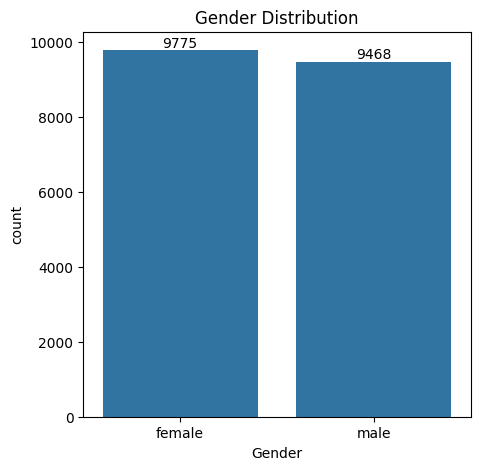

In [20]:
# Creating a bar chart for Gender Distribution
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df,x='Gender')
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

from the above chart we have analysed that the number of femailes in the data is more than the number of males 

In [21]:
# Scores percentages between genders
df.groupby(['Gender']).agg({'MathScore':'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.256164,73.068338,73.070588
male,69.091994,65.885720,63.990283


By observing above we conclude that females were scored more than males

In [22]:
# Calculating the mean to find Relationship between Parent's Education and Student's Score
gb= df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":'mean','WritingScore':'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.541478     71.317685     70.551080
bachelor's degree   70.724379     73.560401     73.873964
high school         64.294461     67.284124     65.495892
master's degree     72.293680     75.922677     76.423792
some college        66.578305     69.300113     68.651525
some high school    62.522417     65.438218     63.572171


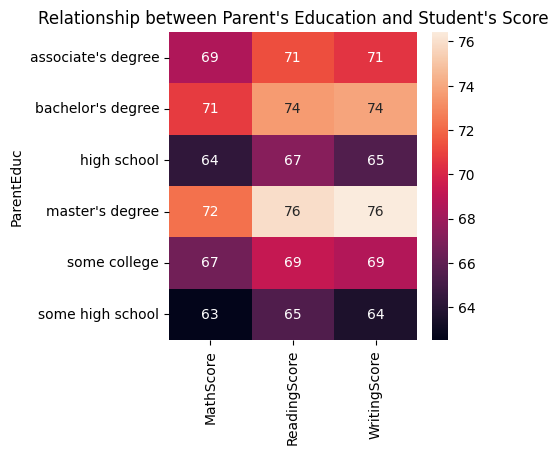

In [23]:
# Creating heatmap of Relationship between Parent's Education and Student's Score
plt.figure(figsize=(4,4))
sns.heatmap(gb,annot=True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()


from the above chart we have concluded that the education of the have a good impact on their scores

In [24]:
# Creating heatmap of Relationship between Parent's Martial status and Student's Score
gb1= df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":'mean','WritingScore':'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.730344     69.816339     68.954545
married              66.705241     69.474248     68.488509
single               66.285590     69.388021     68.543403
widowed              68.083784     70.662162     69.651351


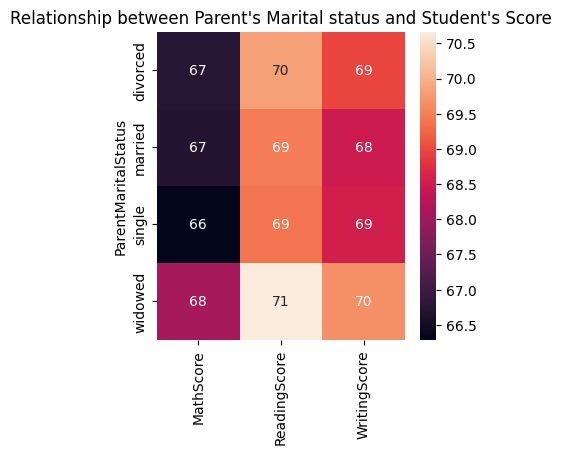

In [25]:
plt.figure(figsize=(4,4))
sns.heatmap(gb1,annot=True)
plt.title("Relationship between Parent's Marital status and Student's Score")
plt.show()

from the above chart we have concluded that there is no/negligiable impact on the student score due to their marital status

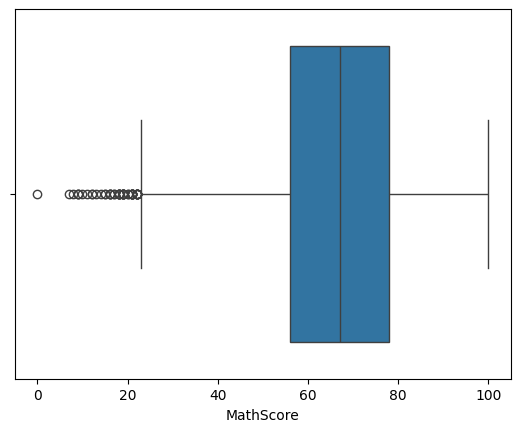

In [26]:
# Creating box chart for Math score
sns.boxplot(data=df,x="MathScore")
plt.show()

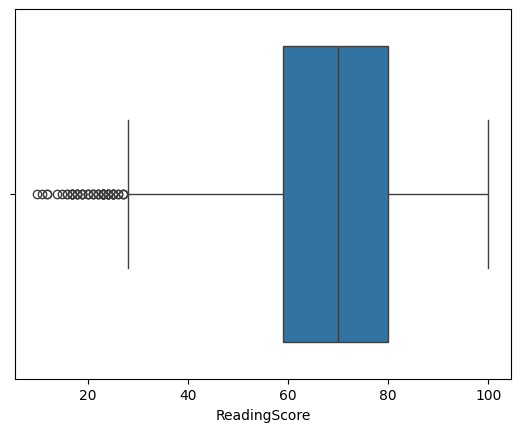

In [27]:
# Creating box chart for Reading score
sns.boxplot(data=df,x="ReadingScore")
plt.show()

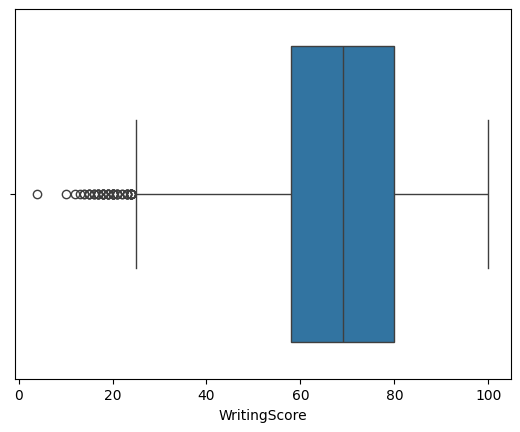

In [28]:
# Creating box chart for Writing score
sns.boxplot(data=df,x="WritingScore")
plt.show()


In [29]:
print(df["EthnicGroup"].unique())

['group B' 'group C' 'group D' 'group A' 'group E']


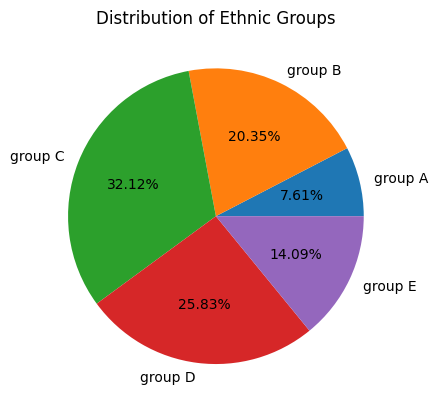

In [30]:
# Distribution of Ethnic Groups
groupA=df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB=df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC=df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD=df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE=df.loc[(df['EthnicGroup'] == 'group E')].count()
l=['group A','group B','group C','group D','group E']
mlist=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.pie(mlist,labels=l,autopct='%1.2f%%')
plt.title('Distribution of Ethnic Groups')
plt.show()

By comparing ethinic groups group E has highest percentage and group A has lowest percentage

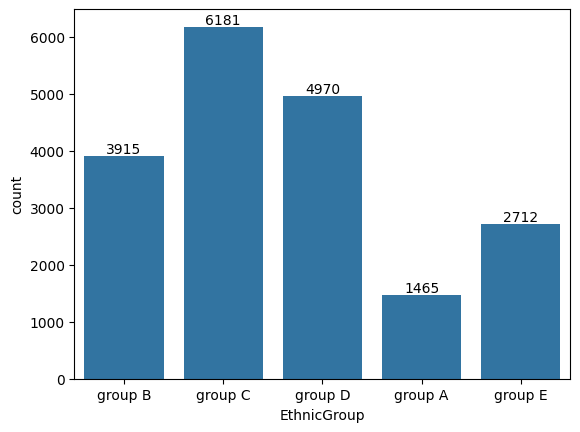

In [31]:
# Creating  bar chart for Ethnic groups
ax=sns.countplot(data=df,x='EthnicGroup')
ax.bar_label(ax.containers[0]) 
plt.show()

From above bar chart we can observe that more student are from group C and less students from grop A

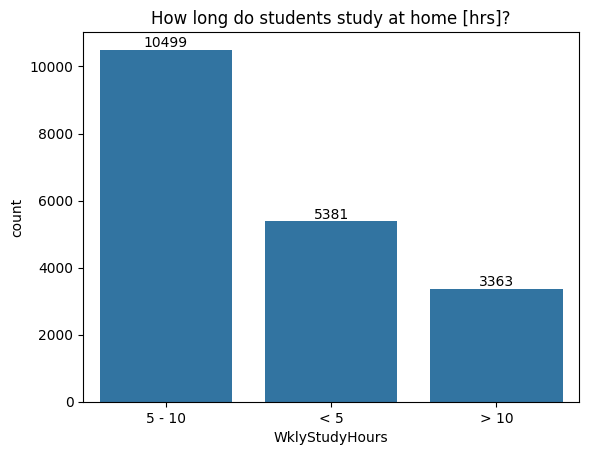

In [32]:
# Creating  bar chart for Ethnic groups
ax=sns.countplot(x=df['WklyStudyHours'],order=['5 - 10', '< 5', '> 10'])
ax.bar_label(ax.containers[0]) 
plt.title('How long do students study at home [hrs]?');

From above bar chart shows the number of students spending time in weekly study hours

In [33]:
# Creating  color map to to visually highlight the aggregated results
df.groupby(['PracticeSport', 'WklyStudyHours', 'ParentEduc']).agg({'MathScore':'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})\
.style.background_gradient(cmap='Blues')

The colormap shows the student scores in various scenario's like in participating sports, spending more time to study, parent educational background vice versa

# Conclusion

The Student_Score dataset provides values insights of Student result based on their performance. Through careful analysis of the given data. Several keys are found
- Parents educational background has impact on student scores.
- Weekly study hours has impact on student scores.
- Females scores percentage is more than the males scores.
- By comparing ethinic groups group E has highest percentage and group A has lowest percentage.